In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
train_dir = './dataset/train'
val_dir = './dataset/val'

batch_size = 32
img_size = (224, 224)  # tamanho padrão para EfficientNetB0

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2]
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 310 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


c:\Users\danda\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

from tensorflow.keras.metrics import AUC

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight={0: 10.0, 1: 1.0}
)



c:\Users\danda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 7s/step - accuracy: 0.4065 - auc: 0.5573 - loss: 3.0091 - val_accuracy: 0.5974 - val_auc: 1.0000 - val_loss: 0.6622
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.7039 - auc: 0.8637 - loss: 1.1603 - val_accuracy: 0.9740 - val_auc: 1.0000 - val_loss: 0.2204
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8801 - auc: 0.9456 - loss: 0.8385 - val_accuracy: 0.9740 - val_auc: 1.0000 - val_loss: 0.0753
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.9205 - auc: 0.9766 - loss: 0.5751 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0157
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.9400 - auc: 0.9902 - loss: 0.3366 - val_accuracy: 0.8701 - val_auc: 1.0000 - val_loss: 0.2454
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.7987 - auc: 0.9631 - loss: 0.6171 - val_accuracy: 0.8701 - val_auc: 1.0000 - val_loss: 0.2335
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - 

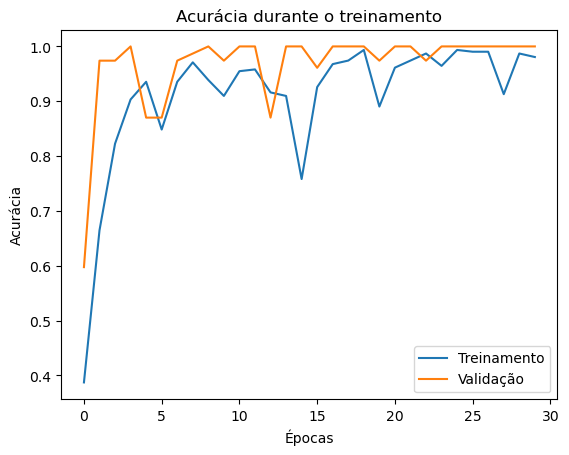

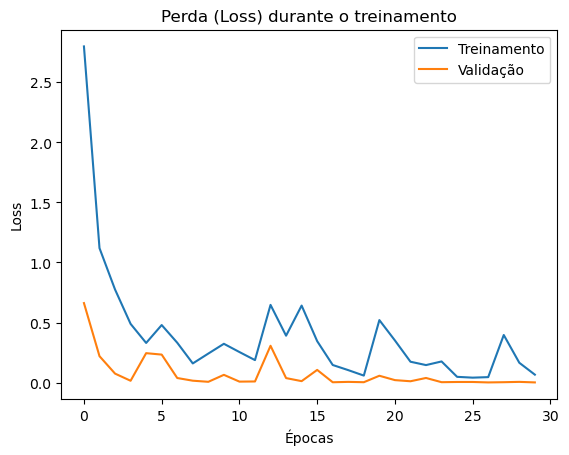

In [6]:
import matplotlib.pyplot as plt

# Acurácia
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss) durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Caminho da imagem de teste (ajuste conforme necessário)
img_path1 = './dataset/train/deficiente/Fe (8).JPG'
img_path2 = './dataset_original/ColetaAmostra3/20250128_163716.jpg'
img_path3 = './dataset_original/iron-Fe/Fe (8).JPG'

img_path = img_path3  # ou img_path2 para testar outra imagem
# Pré-processar a imagem
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Fazer a predição
pred = model.predict(img_array)
classe_prevista = int(pred[0][0] > 0.5)

print(f'Probabilidade da classe 1: {pred[0][0]:.4f}')
print(f'Classe prevista: {classe_prevista}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Probabilidade da classe 1: 0.2686
Classe prevista: 0


In [17]:
# Salvar o modelo treinado com a extensão .h5
model.save("modelo_final_focal.h5")
print("Modelo salvo como modelo_final_focal.h5")

Modelo salvo como modelo_final_focal.h5


In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
import tensorflow as tf

# Redefina a função focal_loss
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        pt_1 = tf.where(K.equal(y_true, 1), y_pred, K.ones_like(y_pred))
        pt_0 = tf.where(K.equal(y_true, 0), y_pred, K.zeros_like(y_pred))
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - \
               K.sum((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed

# Carregar o modelo salvo
model2 = load_model("modelo_final_focal.h5", custom_objects={"focal_loss_fixed": focal_loss(2.0, 0.25)})
print("Modelo carregado com sucesso.")



Modelo carregado com sucesso.


In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Caminho da imagem de teste (ajuste conforme necessário)
img_path1 = 'C:/IPG/Deep-Learning/Dataset/dataset/train/deficiente/Fe (8).JPG'
img_path2 = './dataset_original/ColetaAmostra4/20250128_164523.jpg'
img_path3 = './dataset_original/iron-Fe/Fe (8).JPG'

img_path = img_path1  # ou img_path2 para testar outra imagem
# Pré-processar a imagem
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Fazer a predição
pred = model2.predict(img_array)
classe_prevista = int(pred[0][0] > 0.5)

print(f'Probabilidade da classe 1: {pred[0][0]:.4f}')
print(f'Classe prevista: {classe_prevista}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Probabilidade da classe 1: 0.0001
Classe prevista: 0
